In [2]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# dataset
dataset = pd.read_csv('gdp per capita.csv')

'''here we select only two years to verify for all countries in world'''
dataFrame = dataset[["2010","2011"]]


'''may some countires skipped bcoz they include null values'''

x = dataFrame.dropna()

# make array
X = x.values


In [5]:
'''count total number of values on each year 
   mean values for both years for all countries
   min and max value is also described
   after which values is most in dataframe 
   is all about the description'''
dataFrame.describe()

,2010,2011
count,256.000000,258.000000
mean,14749.500789,16198.068908
std,22142.907842,24251.351938
min,234.235539,249.577979
25%,1655.486199,1866.674318
50%,5475.194363,5979.460608
75%,16722.986730,19868.319985
max,150737.892500,169016.196100


In [6]:
# normalizing the dataset

from sklearn import preprocessing

'''normalize the dataset with builtin library of python sklearn using preprocessing'''
normalized = preprocessing.normalize(X)
normalized

array([[0.68533719, 0.72822588],
       [0.67826274, 0.73481947],
       [0.67665961, 0.73629598],
       [0.6714834 , 0.7410196 ],
       [0.61373543, 0.78951177],
       [0.67814813, 0.73492524],
       [0.68593919, 0.72765887],
       [0.68697377, 0.72668222],
       [0.65409859, 0.7564093 ],
       [0.62863141, 0.77770338],
       [0.67417374, 0.73857279],
       [0.70688255, 0.70733094],
       [0.71534502, 0.69877142],
       [0.63977005, 0.76856638],
       [0.67375786, 0.7389522 ],
       [0.63071677, 0.77601311],
       [0.68433938, 0.72916364],
       [0.68178273, 0.73155472],
       [0.67588431, 0.73700773],
       [0.6530977 , 0.75727366],
       [0.67160516, 0.74090925],
       [0.65768798, 0.75329046],
       [0.67721588, 0.73578438],
       [0.71257155, 0.70159945],
       [0.67314294, 0.7395124 ],
       [0.67880249, 0.7343209 ],
       [0.69457916, 0.71941628],
       [0.7214797 , 0.69243559],
       [0.64021892, 0.76819251],
       [0.64856515, 0.76115915],
       [0.

E:\Files\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


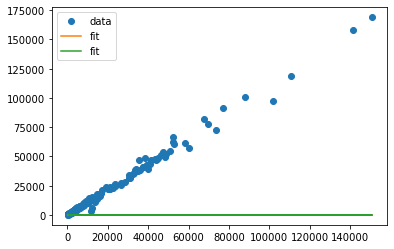

In [15]:
#curve_fit() method

#Import curve fitting package from scipy
from scipy.optimize import curve_fit


xdata = x["2010"]
ydata = x["2011"]

'''guassian function that use in curve fit this is chunk of function that use in future function 
    call this method to make curve fit that is builtin function of scipy'''
def guass(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
param, cov = curve_fit(guass,xdata, ydata)

A = param[0]
B = param[1]

#     fit y 
y = guass(x, A, B)

#     plotting
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, y, '-', label='fit')
plt.legend()

In [18]:
# prediction for future values
from sklearn.cluster import KMeans

'''how many clusters make from this dataset'''
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


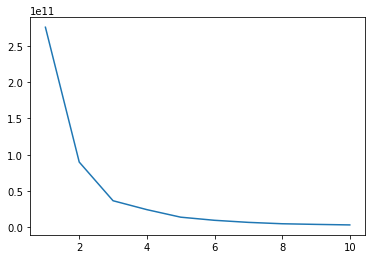

In [28]:
plt.plot(range(1,11),wcss)
plt.show()

In [21]:

'''from above elbow chart we easily make 5 different clusters'''

kmeans = KMeans(n_clusters = 5, init = "k-means++")
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 4, 0, 3, 3, 1, 0, 0, 0, 1, 3, 4, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 3, 3, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0,
       1, 0, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 4, 0, 0, 1,
       1, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 1, 4, 0, 3, 0, 0,
       3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 3, 3, 1, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

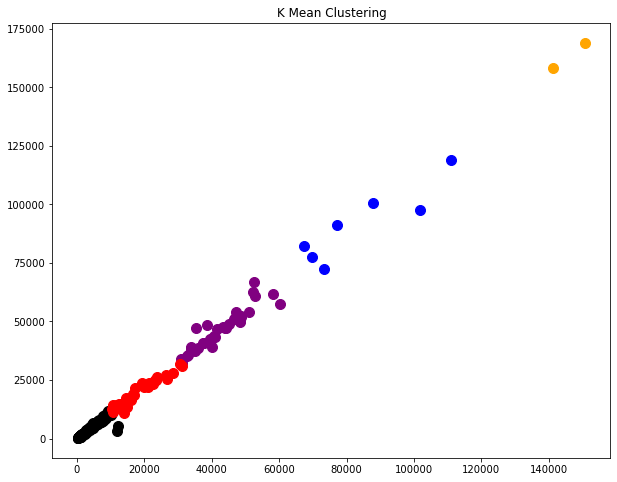

In [27]:
'''as the prediction above show which record belong to which cluster is mentioned in above prediction'''


plt.figure(figsize = (10,8))
plt.title("K Mean Clustering")
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c="black")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c="purple")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c="orange")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c="red")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c="blue")
plt.show()



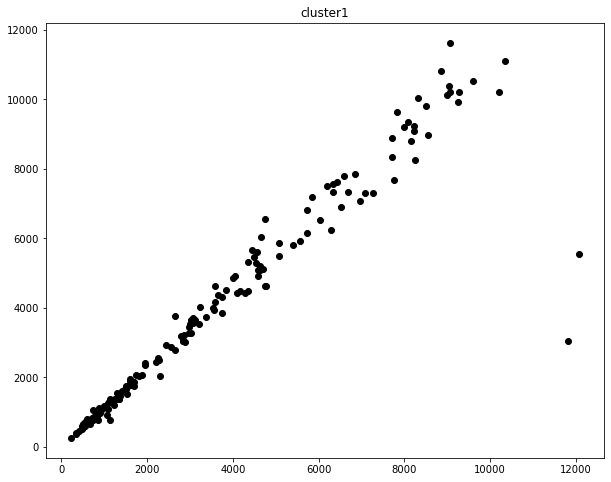

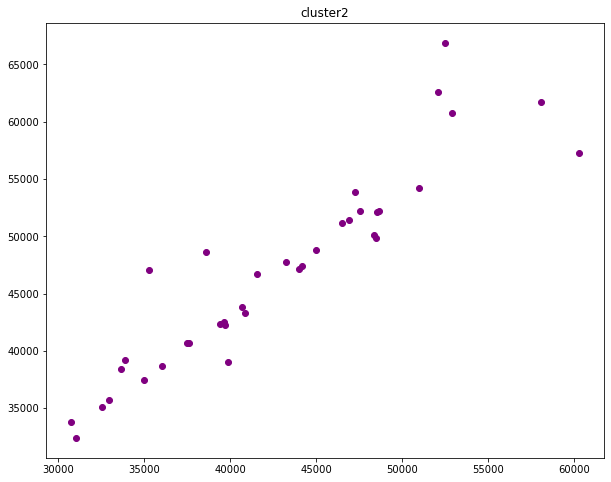

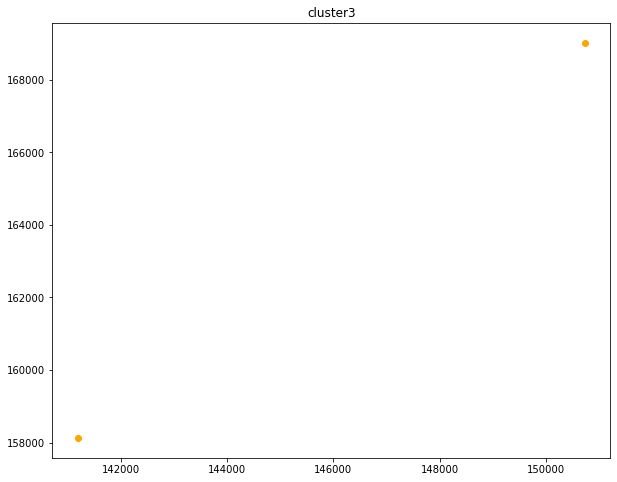

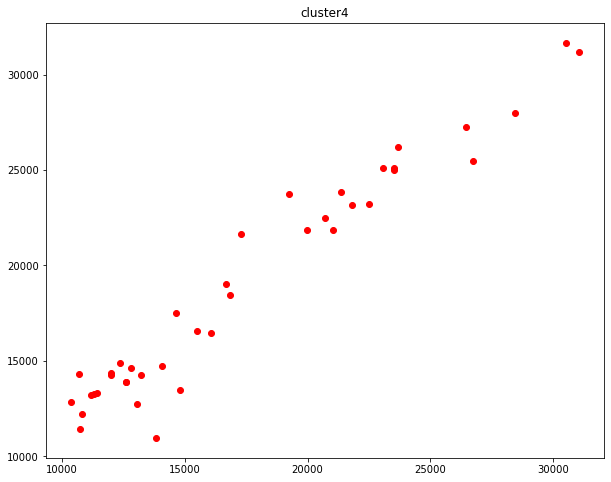

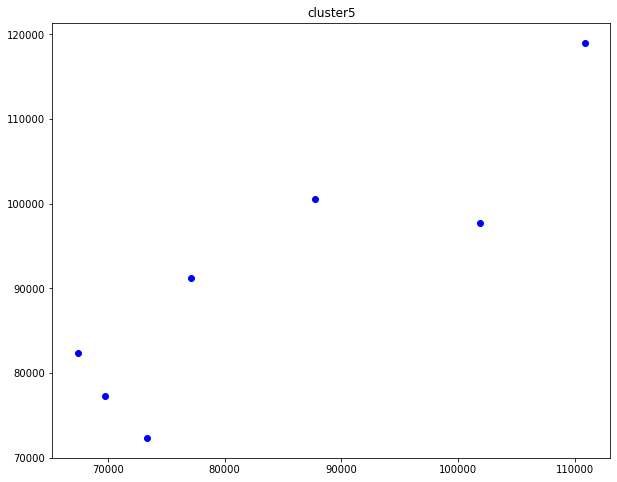

In [26]:
# Interpretation of the results.
'''black show most elements of dataset,
   red show after black in rich quantity
   purple placed after red
   then blue and orange'''
clor = ["black","purple", "orange","red","blue"]
for i in range(5):
    plt.figure(figsize=(10,8))
    plt.title(f"cluster{i+1}")
    plt.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], color=clor[i])
    plt.show()